
**Business Inferences:**

Provide meaningful insights from the dataset that can support strategic decisions.


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BA assesment.csv", encoding='latin1')
df.columns = [c.strip() for c in df.columns]



In [16]:
# Identify converted leads
df['is_converted'] = df['Stage__c'].str.contains('Registered|Enrolled|Won|Converted', case=False, na=False)


In [17]:
# Basic KPIs
total_leads = len(df)
total_converted = df['is_converted'].sum()
conversion_rate = (total_converted / total_leads) * 100

In [18]:
# Print KPI summary
print("===== Business KPIs =====")
print(f"Total Leads: {total_leads}")
print(f"Total Conversions: {total_converted}")
print(f"Overall Conversion Rate: {conversion_rate:.2f}%")


===== Business KPIs =====
Total Leads: 22479
Total Conversions: 886
Overall Conversion Rate: 3.94%


In [19]:
#average leads per source
leads_per_source = df.groupby('Lead_Source__c').size().mean()
print(f"Average Leads per Source: {leads_per_source:.1f}")


Average Leads per Source: 1248.6


**Identify Trends & Patterns Impacting Overall Business Performance:**

Identify trends and patterns impacting overall business performance.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("BA assesment.csv", encoding='latin1')
df.columns = [c.strip() for c in df.columns]

In [21]:
# Ensure date column is in datetime format (adjust if your dataset has a different name)
if 'CreatedDate' in df.columns:
    df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce')
    df['Month'] = df['CreatedDate'].dt.to_period('M')

/tmp/ipython-input-3739385987.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce')


In [22]:
# Create conversion flag
df['is_converted'] = df['Stage__c'].str.contains('Registered|Enrolled|Won|Converted', case=False, na=False)


In [23]:
# Monthly trend analysis
trend = df.groupby('Month').agg(
    Leads=('Lead_Source__c', 'count'),
    Conversions=('is_converted', 'sum')
)
trend['Conversion Rate'] = (trend['Conversions'] / trend['Leads']) * 100

print("===== Monthly Business Trends =====")
print(trend.tail())


===== Monthly Business Trends =====
         Leads  Conversions  Conversion Rate
Month                                       
2025-01      1            0         0.000000
2025-02   5748          242         4.210160
2025-03   7476          296         3.959337
2025-04   9249          348         3.762569


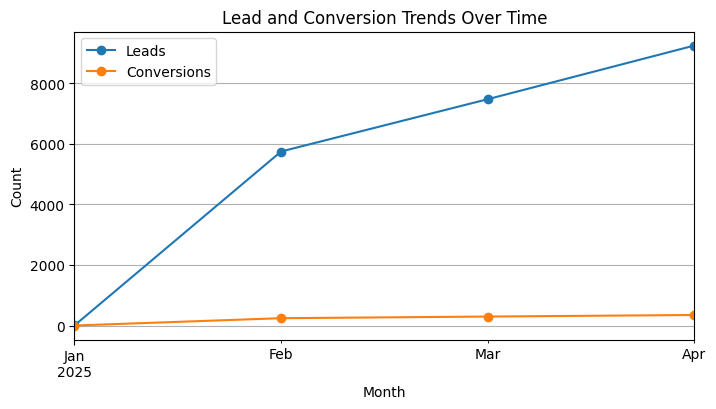

In [24]:
# Visualization
trend[['Leads', 'Conversions']].plot(kind='line', marker='o', figsize=(8,4))
plt.title("Lead and Conversion Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.show()

**Source & Campaign Performance:**

Analyze which sources and campaigns are yielding the best results.

In [25]:
import pandas as pd

# Load and prepare data
df = pd.read_csv("BA assesment.csv", encoding='latin1')
df.columns = [c.strip() for c in df.columns]


In [26]:
# Conversion flag
df['is_converted'] = df['Stage__c'].str.contains('Registered|Enrolled|Won|Converted', case=False, na=False)


In [27]:
# Group by Lead Source
source_perf = df.groupby('Lead_Source__c').agg(
    Leads=('Lead_Source__c', 'count'),
    Conversions=('is_converted', 'sum')
)
source_perf['Conversion Rate (%)'] = (source_perf['Conversions'] / source_perf['Leads']) * 100
source_perf = source_perf.sort_values(by='Conversion Rate (%)', ascending=False)

print("===== Source Performance =====")
print(source_perf.head(10))


===== Source Performance =====
                Leads  Conversions  Conversion Rate (%)
Lead_Source__c                                         
Referrals         241           79            32.780083
Presales Lead      72           10            13.888889
Phone Inquiry    2227          295            13.246520
Google             16            1             6.250000
Web               277           13             4.693141
Website          3345          147             4.394619
Whatsapp Sfmc     130            5             3.846154
Google Adwords    277           10             3.610108
Facebook        10354          270             2.607688
Whatsapp         2080           38             1.826923


In [28]:
# Campaign Name column:
if 'Campaign_Name__c' in df.columns:
    campaign_perf = df.groupby('Campaign_Name__c').agg(
        Leads=('Campaign_Name__c', 'count'),
        Conversions=('is_converted', 'sum')
    )
    campaign_perf['Conversion Rate (%)'] = (campaign_perf['Conversions'] / campaign_perf['Leads']) * 100
    campaign_perf = campaign_perf.sort_values(by='Conversion Rate (%)', ascending=False)
    print("\n===== Campaign Performance =====")
    print(campaign_perf.head(10))


===== Campaign Performance =====
                                             Leads  Conversions  \
Campaign_Name__c                                                  
Medical Coding Course Aprilâ                     2            1   
Post Graduation Clinical Research-Karnataka      5            1   
Lp_Cr-Inhouse_Chennai                           13            2   
Bioinformaticsfeb 25 Campaign                    7            1   
Cr-In-House-Nov-24-Karnataka                    32            4   
1.20E+17                                         9            1   
Malayalam Campaign All Courses                  48            5   
Lp-Cr-Inhouse-Chennai                           35            3   
Bioinformaticss Feb 25 Campaign                 13            1   
Malayalam Campaign                             116            8   

                                             Conversion Rate (%)  
Campaign_Name__c                                                  
Medical Coding Course April

**Recommend Ways to Improve Performance & Increase Revenue:**

Based on the analysis, recommend ways to improve performance and increase revenue.

In [29]:
# Identify low-performing sources
low_perf_sources = source_perf[source_perf['Conversion Rate (%)'] < source_perf['Conversion Rate (%)'].mean()]
print("===== Low Performing Sources =====")
print(low_perf_sources)


===== Low Performing Sources =====
                Leads  Conversions  Conversion Rate (%)
Lead_Source__c                                         
Web               277           13             4.693141
Website          3345          147             4.394619
Whatsapp Sfmc     130            5             3.846154
Google Adwords    277           10             3.610108
Facebook        10354          270             2.607688
Whatsapp         2080           38             1.826923
B2B               352            4             1.136364
Demo_Session       92            1             1.086957
Jd Website        214            2             0.934579
Vas Whatsapp     1833            8             0.436443
Linkedin          922            3             0.325380
Collegedunia        7            0             0.000000
Lead_Source__C      1            0             0.000000
Job Leads          34            0             0.000000


In [30]:
# Identify top performers (to scale up)
top_perf_sources = source_perf[source_perf['Conversion Rate (%)'] >= source_perf['Conversion Rate (%)'].mean()]
print("\n===== Top Performing Sources =====")
print(top_perf_sources)


===== Top Performing Sources =====
                Leads  Conversions  Conversion Rate (%)
Lead_Source__c                                         
Referrals         241           79            32.780083
Presales Lead      72           10            13.888889
Phone Inquiry    2227          295            13.246520
Google             16            1             6.250000


**Lead Generation – Strengths & Weaknesses:**

Evaluate the effectiveness of lead generation efforts.

In [31]:
import pandas as pd

# Load and prepare data
df = pd.read_csv("BA assesment.csv", encoding='latin1')
df.columns = [c.strip() for c in df.columns]


In [32]:
# Conversion flag
df['is_converted'] = df['Stage__c'].str.contains('Registered|Enrolled|Won|Converted', case=False, na=False)


In [33]:
# Group by Lead Source for evaluation
lead_gen_eval = df.groupby('Lead_Source__c').agg(
    Total_Leads=('Lead_Source__c', 'count'),
    Conversions=('is_converted', 'sum')
)
lead_gen_eval['Conversion_Rate (%)'] = (lead_gen_eval['Conversions'] / lead_gen_eval['Total_Leads']) * 100
lead_gen_eval = lead_gen_eval.sort_values(by='Conversion_Rate (%)', ascending=False)

print("===== Lead Generation Effectiveness =====")
print(lead_gen_eval)

===== Lead Generation Effectiveness =====
                Total_Leads  Conversions  Conversion_Rate (%)
Lead_Source__c                                               
Referrals               241           79            32.780083
Presales Lead            72           10            13.888889
Phone Inquiry          2227          295            13.246520
Google                   16            1             6.250000
Web                     277           13             4.693141
Website                3345          147             4.394619
Whatsapp Sfmc           130            5             3.846154
Google Adwords          277           10             3.610108
Facebook              10354          270             2.607688
Whatsapp               2080           38             1.826923
B2B                     352            4             1.136364
Demo_Session             92            1             1.086957
Jd Website              214            2             0.934579
Vas Whatsapp           1833 

In [36]:
# Identify strong and weak lead sources
avg_rate = lead_gen_eval['Conversion_Rate (%)'].mean()
strong_sources = lead_gen_eval[lead_gen_eval['Conversion_Rate (%)'] >= avg_rate]
weak_sources = lead_gen_eval[lead_gen_eval['Conversion_Rate (%)'] < avg_rate]

print("\nStrong Lead Sources (Above Avg Conversion):")
print(strong_sources)
print("\nWeak Lead Sources (Below Avg Conversion):")
print(weak_sources)


Strong Lead Sources (Above Avg Conversion):
                Total_Leads  Conversions  Conversion_Rate (%)
Lead_Source__c                                               
Referrals               241           79            32.780083
Presales Lead            72           10            13.888889
Phone Inquiry          2227          295            13.246520
Google                   16            1             6.250000

Weak Lead Sources (Below Avg Conversion):
                Total_Leads  Conversions  Conversion_Rate (%)
Lead_Source__c                                               
Web                     277           13             4.693141
Website                3345          147             4.394619
Whatsapp Sfmc           130            5             3.846154
Google Adwords          277           10             3.610108
Facebook              10354          270             2.607688
Whatsapp               2080           38             1.826923
B2B                     352            4    

**Identify Gaps & Propose Optimization Strategies:**

Identify gaps in lead generation and propose optimization strategies.

In [37]:
# reuse 'lead_gen_eval' from Point 5

 # Calculate average conversion rate
avg_conv_rate = lead_gen_eval['Conversion_Rate (%)'].mean()

In [38]:
# Find gaps – sources below average
gaps = lead_gen_eval[lead_gen_eval['Conversion_Rate (%)'] < avg_conv_rate]
print("===== Gaps in Lead Generation =====")
print(gaps)


===== Gaps in Lead Generation =====
                Total_Leads  Conversions  Conversion_Rate (%)
Lead_Source__c                                               
Web                     277           13             4.693141
Website                3345          147             4.394619
Whatsapp Sfmc           130            5             3.846154
Google Adwords          277           10             3.610108
Facebook              10354          270             2.607688
Whatsapp               2080           38             1.826923
B2B                     352            4             1.136364
Demo_Session             92            1             1.086957
Jd Website              214            2             0.934579
Vas Whatsapp           1833            8             0.436443
Linkedin                922            3             0.325380
Collegedunia              7            0             0.000000
Lead_Source__C            1            0             0.000000
Job Leads                34       

In [42]:
# Estimate potential gain if low-performing sources improved to average rate
gaps['Potential_Extra_Conversions'] = (
    (avg_conv_rate - gaps['Conversion_Rate (%)']) / 100 * gaps['Total_Leads']
).astype(int)

print("\n===== Potential Gain if Optimized =====")
print(gaps[['Total_Leads', 'Conversion_Rate (%)', 'Potential_Extra_Conversions']])


===== Potential Gain if Optimized =====
                Total_Leads  Conversion_Rate (%)  Potential_Extra_Conversions
Lead_Source__c                                                               
Web                     277             4.693141                            1
Website                3345             4.394619                           22
Whatsapp Sfmc           130             3.846154                            1
Google Adwords          277             3.610108                            4
Facebook              10354             2.607688                          253
Whatsapp               2080             1.826923                           67
B2B                     352             1.136364                           13
Demo_Session             92             1.086957                            3
Jd Website              214             0.934579                            8
Vas Whatsapp           1833             0.436443                           84
Linkedin               

/tmp/ipython-input-3653803569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaps['Potential_Extra_Conversions'] = (


**Team Performance Analysis – Identify Strong and Underperforming Team Members:**

Identify strong and underperforming team members based on the provided metrics.

In [43]:
# Conversion flag
df['is_converted'] = df['Stage__c'].str.contains('Registered|Enrolled|Won|Converted', case=False, na=False)


In [44]:
# Identify the team or owner column
team_col = None
for col in df.columns:
    if 'owner' in col.lower() or 'team' in col.lower() or 'assigned' in col.lower():
        team_col = col
        break

print(f"Detected team/owner column: {team_col}")


Detected team/owner column: OwnerId


In [45]:
# Group by team member / owner
team_perf = df.groupby(team_col).agg(
    Leads=('Stage__c', 'count'),
    Conversions=('is_converted', 'sum')
)
team_perf['Conversion Rate (%)'] = (team_perf['Conversions'] / team_perf['Leads']) * 100
team_perf = team_perf.sort_values(by='Conversion Rate (%)', ascending=False)

print("===== Team Performance =====")
print(team_perf.head(10))

===== Team Performance =====
                    Leads  Conversions  Conversion Rate (%)
OwnerId                                                    
005IR00000GLUL7YAP     13           13           100.000000
005IR00000GLf9XYAT      3            3           100.000000
005IR00000GLUuEYAX      2            2           100.000000
005IR00000GN1peYAD      4            4           100.000000
005IR00000GN0b5YAD      1            1           100.000000
005IR00000GN2ylYAD      1            1           100.000000
005IR00000GN2yqYAD      1            1           100.000000
005IR00000GMUdbYAH      5            5           100.000000
005IR00000GLuICYA1      2            2           100.000000
005IR00000GLknpYAD     21           20            95.238095


In [49]:
# Identify underperformers (below average)
avg_team_rate = team_perf['Conversion Rate (%)'].mean()
underperformers = team_perf[team_perf['Conversion Rate (%)'] < avg_team_rate]

print("===== Underperforming Team Members =====")
print(underperformers)


===== Underperforming Team Members =====
                    Leads  Conversions  Conversion Rate (%)
OwnerId                                                    
005IR00000GLUudYAH     28            0             0.000000
005IR00000GLULCYA5      5            0             0.000000
005IR00000GMhG6YAL     41            0             0.000000
005IR00000GMfKiYAL      3            0             0.000000
005IR00000GMdybYAD    149            0             0.000000
005IR00000GMbALYA1     24            0             0.000000
005IR00000GMbANYA1    189            0             0.000000
00GIR000003vPu52AE   2722            0             0.000000
00GIR000003vHMq2AM    425            0             0.000000
00GIR000003vGIN2A2      1            0             0.000000
005IR00000GN3vYYAT      1            0             0.000000
005IR00000GN3vXYAT      8            0             0.000000
005IR00000GN3vWYAT     34            0             0.000000
005IR00000GN2UGYA1     34            0             0.000000

In [50]:
# Estimate potential improvement if trained
underperformers['Potential_Conversions_If_Avg'] = (
    (avg_team_rate / 100 * underperformers['Leads']).astype(int)
)
underperformers['Expected_Gain'] = underperformers['Potential_Conversions_If_Avg'] - underperformers['Conversions']

print("\n===== Estimated Improvement with Training =====")
print(underperformers[['Leads', 'Conversions', 'Conversion Rate (%)', 'Expected_Gain']])


===== Estimated Improvement with Training =====
                    Leads  Conversions  Conversion Rate (%)  Expected_Gain
OwnerId                                                                   
005IR00000GLUudYAH     28            0             0.000000              9
005IR00000GLULCYA5      5            0             0.000000              1
005IR00000GMhG6YAL     41            0             0.000000             13
005IR00000GMfKiYAL      3            0             0.000000              1
005IR00000GMdybYAD    149            0             0.000000             49
005IR00000GMbALYA1     24            0             0.000000              8
005IR00000GMbANYA1    189            0             0.000000             63
00GIR000003vPu52AE   2722            0             0.000000            912
00GIR000003vHMq2AM    425            0             0.000000            142
00GIR000003vGIN2A2      1            0             0.000000              0
005IR00000GN3vYYAT      1            0             

/tmp/ipython-input-1169012667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underperformers['Potential_Conversions_If_Avg'] = (
/tmp/ipython-input-1169012667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underperformers['Expected_Gain'] = underperformers['Potential_Conversions_If_Avg'] - underperformers['Conversions']


**Suggested Support & Training Actions**

**1. Sales follow-up quality:**
Conduct training on effective lead nurturing and follow-up communication.

**2. Product knowledge:**
Organize product knowledge refreshers for low-performing members.

**3. CRM usage:**
Teach efficient CRM use for tracking and follow-up reminders.

**4. Peer learning:**
Pair low-performing members with top performers for mentorship.

**5. Incentive programs:**
Introduce small rewards for conversion milestones to boost motivation.